In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
y = np.random.randint(0,2, size=100)

In [5]:
y

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [6]:
def logloss(y, yhat):
    return -y*np.log(yhat)-(1-y)*np.log(1-yhat)

In [7]:
y = 1
yhat = 0.9

logloss(y, yhat)

0.10536051565782628

In [8]:
y = 1
yhat = 0.95

logloss(y, yhat)

0.05129329438755058

In [9]:
y = 1
yhat = 0.99

logloss(y, yhat)

0.01005033585350145

In [10]:
y = 1
yhat = 0.5

logloss(y, yhat)

0.6931471805599453

In [11]:
y = 1
yhat = 0.3

logloss(y, yhat)

1.2039728043259361

In [14]:
y = 1
yhat = 0.1

logloss(y, yhat)

2.3025850929940455

# Logisitic Regression

In [15]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [17]:
def predict(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

In [18]:
def error(X, Y, weights):
    
    Yhat = predict(X, weights)
    
    err = np.mean(Y*np.log(Yhat) + (1-Y)*np.log(1-Yhat))
    
    return -err 

In [19]:
def gradient(X, Y, weights):
    
    n = X.shape[0]
    
    Y_hat = predict(X, weights) 
    grad = np.dot(X.T, Y - Y_hat)
    
    grad = (grad*-2)/n
    
    return grad

In [21]:
def gradient_descent(X, Y, epochs=800, learning_rate =0.1): 
    
    weights = np.zeros((X.shape[1],1)) 
    error_list = [] 
    
    
    for i in range(epochs): 
        # Compute grad 
        grad = gradient(X,Y,weights) 
        
        e = error(X,Y,weights) 
        error_list.append(e) 
        
        #Update weights 
        weights = weights - learning_rate*grad
        

    
    return weights, error_list

### Simulate Data

In [23]:
from sklearn.datasets import make_classification

In [25]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=5)

In [26]:
X.shape

(500, 2)

In [28]:
y.shape

(500,)

In [30]:
y = y.reshape(500, 1)

In [31]:
y.shape

(500, 1)

In [33]:
X[:5]

array([[ 1.22167239, -0.4757541 ],
       [-0.2292072 , -1.85663378],
       [-1.34913896,  0.50458721],
       [ 0.31402206, -1.62029248],
       [ 1.13807877, -0.99148158]])

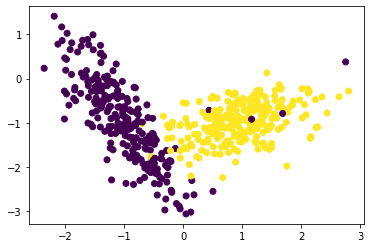

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [39]:
ones = np.ones((500,1))
X_ = np.hstack((ones, X))
X_[:5]

array([[ 1.        ,  1.22167239, -0.4757541 ],
       [ 1.        , -0.2292072 , -1.85663378],
       [ 1.        , -1.34913896,  0.50458721],
       [ 1.        ,  0.31402206, -1.62029248],
       [ 1.        ,  1.13807877, -0.99148158]])

In [40]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

In [47]:
weights, loss = gradient_descent(X_train, y_train)

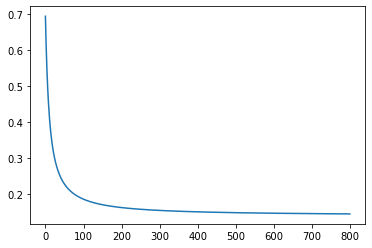

In [48]:
plt.plot(loss)

In [49]:
weights

array([[1.0806578 ],
       [4.23158543],
       [0.60152621]])

In [57]:
predict(X_test, weights).round(2)[:5]

array([[1.  ],
       [0.98],
       [0.99],
       [0.16],
       [0.03]])

In [58]:
y_pred = np.round(predict(X_test, weights).round(2))

In [60]:
y_pred[:5]

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [61]:
y_test[:5]

array([[1],
       [1],
       [1],
       [0],
       [0]])

0.95

In [65]:
def accuracy(y_actual, y_pred):
    '''These should be labels (0,1)'''
    
    return (y_pred == y_test).sum()/len(y_pred)

In [66]:
accuracy(y_test, y_pred)

0.95

In [73]:
f1 = np.array([-1, 1])

In [74]:
f2 = -(weights[0] + weights[1]*f1)/weights[2]

In [76]:
f1, f2

(array([-1,  1]), array([ 5.23822166, -8.83127473]))

In [77]:
# (-1, 5.23) and (1, -8.83)

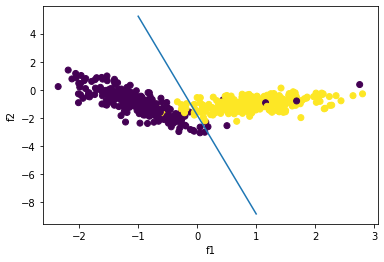

In [78]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(f1, f2)
plt.xlabel("f1")
plt.ylabel("f2")
plt.show()